# Group Assignment ML2 (MBD-EN-BL ENE-2021 J-1)
_Group E - Disha Saxena, Elias Theodoropoulos, Jan P. Thoma, Nalisha Mén, Ramón Denia_ 

In this assignment we are going to focus on the game Counter Strike GO (not bad, right?). Well, hold your
horses since we are going to use Machine Learning not quite for playing but for deciding who’s going to win
a match.

***

<img src="header.jpg">

## Data Cleaning

### Importing Libraries

In [98]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt # a plotting library for the Python programming language and its numerical mathematics extension NumPy
import numpy as np #library for dding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import seaborn as sns # data visualization library based on matplotlib
import datetime as dt # The datetime module supplies classes for manipulating dates and times
from pandas_profiling import ProfileReport
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

<ipython-input-98-3c2d604f3e85>:12: UserWarning: DelftStack
  warnings.warn('DelftStack')


### Importing Dataset

In [2]:
csgo = pd.read_csv("modeling_set.csv")

### Data Exploration

In [3]:
print(csgo.head())

   time_left  ct_score  t_score          map  bomb_planted  ct_health  \
0      74.93       1.0      1.0   de_vertigo         False      408.0   
1      94.90       7.0     11.0     de_dust2         False      400.0   
2      34.95       2.0      5.0   de_inferno         False      399.0   
3       4.29       0.0      4.0   de_inferno          True      265.0   
4     175.00       1.0      8.0  de_overpass         False      400.0   

   t_health  ct_armor  t_armor  ct_money  t_money  ct_helmets  t_helmets  \
0     500.0     368.0    500.0    1150.0   7950.0         1.0        5.0   
1     485.0       0.0    471.0    7650.0  19000.0         0.0        5.0   
2     400.0     488.0    352.0    4100.0  28900.0         0.0        4.0   
3     400.0     100.0    373.0    7200.0  24200.0         0.0        4.0   
4     500.0       0.0    467.0   14000.0  15500.0         0.0        5.0   

   ct_defuse_kits  ct_players_alive  t_players_alive  ct_weapon_ak47  \
0             0.0               

In [4]:
# shape and data types of the data
print(csgo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97928 entries, 0 to 97927
Data columns (total 97 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   time_left                     97928 non-null  float64
 1   ct_score                      97928 non-null  float64
 2   t_score                       97928 non-null  float64
 3   map                           97928 non-null  object 
 4   bomb_planted                  97928 non-null  bool   
 5   ct_health                     97928 non-null  float64
 6   t_health                      97928 non-null  float64
 7   ct_armor                      97928 non-null  float64
 8   t_armor                       97928 non-null  float64
 9   ct_money                      97928 non-null  float64
 10  t_money                       97928 non-null  float64
 11  ct_helmets                    97928 non-null  float64
 12  t_helmets                     97928 non-null  float64
 13  c

In [5]:
# select numeric columns
al_numeric = csgo.select_dtypes(include=[np.number])
numeric_cols = al_numeric.columns.values
print(numeric_cols)

['time_left' 'ct_score' 't_score' 'ct_health' 't_health' 'ct_armor'
 't_armor' 'ct_money' 't_money' 'ct_helmets' 't_helmets' 'ct_defuse_kits'
 'ct_players_alive' 't_players_alive' 'ct_weapon_ak47' 't_weapon_ak47'
 'ct_weapon_aug' 't_weapon_aug' 'ct_weapon_awp' 't_weapon_awp'
 'ct_weapon_bizon' 't_weapon_bizon' 'ct_weapon_cz75auto'
 't_weapon_cz75auto' 'ct_weapon_elite' 't_weapon_elite' 'ct_weapon_famas'
 't_weapon_famas' 'ct_weapon_g3sg1' 't_weapon_g3sg1' 'ct_weapon_galilar'
 't_weapon_galilar' 'ct_weapon_glock' 't_weapon_glock' 'ct_weapon_m249'
 't_weapon_m249' 'ct_weapon_m4a1s' 't_weapon_m4a1s' 'ct_weapon_m4a4'
 't_weapon_m4a4' 'ct_weapon_mac10' 't_weapon_mac10' 'ct_weapon_mag7'
 't_weapon_mag7' 'ct_weapon_mp5sd' 't_weapon_mp5sd' 'ct_weapon_mp7'
 't_weapon_mp7' 'ct_weapon_mp9' 't_weapon_mp9' 'ct_weapon_negev'
 't_weapon_negev' 'ct_weapon_nova' 't_weapon_nova' 'ct_weapon_p90'
 't_weapon_p90' 'ct_weapon_r8revolver' 't_weapon_r8revolver'
 'ct_weapon_sawedoff' 't_weapon_sawedoff' 'ct_wea

In [6]:
# select non numeric columns
al_non_numeric = csgo.select_dtypes(exclude=[np.number])
non_numeric_cols = al_non_numeric.columns.values
print(non_numeric_cols)

['map' 'bomb_planted' 'round_winner']


<AxesSubplot:>

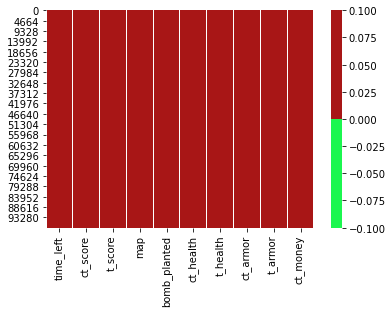

In [7]:
#missing values
cols = csgo.columns[:10] # all columns
colours = ['#1bf74f', '#a81616'] # red is missing. green is not missing.
sns.heatmap(csgo[cols].isnull(), cmap=sns.color_palette(colours))

In [8]:
# % of missing.
for col in csgo.columns:
    pct_missing = np.mean(csgo[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100),3))
#No missing values

time_left - 0%
ct_score - 0%
t_score - 0%
map - 0%
bomb_planted - 0%
ct_health - 0%
t_health - 0%
ct_armor - 0%
t_armor - 0%
ct_money - 0%
t_money - 0%
ct_helmets - 0%
t_helmets - 0%
ct_defuse_kits - 0%
ct_players_alive - 0%
t_players_alive - 0%
ct_weapon_ak47 - 0%
t_weapon_ak47 - 0%
ct_weapon_aug - 0%
t_weapon_aug - 0%
ct_weapon_awp - 0%
t_weapon_awp - 0%
ct_weapon_bizon - 0%
t_weapon_bizon - 0%
ct_weapon_cz75auto - 0%
t_weapon_cz75auto - 0%
ct_weapon_elite - 0%
t_weapon_elite - 0%
ct_weapon_famas - 0%
t_weapon_famas - 0%
ct_weapon_g3sg1 - 0%
t_weapon_g3sg1 - 0%
ct_weapon_galilar - 0%
t_weapon_galilar - 0%
ct_weapon_glock - 0%
t_weapon_glock - 0%
ct_weapon_m249 - 0%
t_weapon_m249 - 0%
ct_weapon_m4a1s - 0%
t_weapon_m4a1s - 0%
ct_weapon_m4a4 - 0%
t_weapon_m4a4 - 0%
ct_weapon_mac10 - 0%
t_weapon_mac10 - 0%
ct_weapon_mag7 - 0%
t_weapon_mag7 - 0%
ct_weapon_mp5sd - 0%
t_weapon_mp5sd - 0%
ct_weapon_mp7 - 0%
t_weapon_mp7 - 0%
ct_weapon_mp9 - 0%
t_weapon_mp9 - 0%
ct_weapon_negev - 0%
t_weapon_

In [9]:
csgo["round_winner"].value_counts()

T     49925
CT    48003
Name: round_winner, dtype: int64

In [10]:
csgo["time_left"].value_counts()

175.00    8969
174.91    3546
174.95    3446
114.95    2884
94.95     2837
          ... 
65.78        1
86.02        1
112.29       1
12.83        1
11.79        1
Name: time_left, Length: 10058, dtype: int64

In [11]:
csgo["bomb_planted"].value_counts()

False    86938
True     10990
Name: bomb_planted, dtype: int64

In [12]:
#profile = ProfileReport(csgo, title="Pandas Profiling Report", explorative=False)
#profile

## Data Preparation

In [13]:
#changing data type from categorical to numerical for target
csgo["terrorist_winner"] = csgo["round_winner"]
csgo["terrorist_winner"].replace("T",1,inplace=True)
csgo["terrorist_winner"].replace("CT",0,inplace=True)

In [14]:
#changing data from categorical to numerical for bomb_planted
csgo["bomb_planted"].replace(True,1,inplace=True)
csgo["bomb_planted"].replace(False,0,inplace=True)

In [15]:
#Performing one-hot encoding on the feature map
map_dummies = pd.get_dummies(csgo["map"],drop_first=True)
map_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97928 entries, 0 to 97927
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   de_dust2     97928 non-null  uint8
 1   de_inferno   97928 non-null  uint8
 2   de_mirage    97928 non-null  uint8
 3   de_nuke      97928 non-null  uint8
 4   de_overpass  97928 non-null  uint8
 5   de_train     97928 non-null  uint8
 6   de_vertigo   97928 non-null  uint8
dtypes: uint8(7)
memory usage: 669.6 KB


In [16]:
#Joining the dummy dataset for map and the original dataset
csgo = pd.concat([csgo, map_dummies], axis=1)
csgo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97928 entries, 0 to 97927
Columns: 105 entries, time_left to de_vertigo
dtypes: float64(94), int64(2), object(2), uint8(7)
memory usage: 73.9+ MB


In [17]:
# % of missing.
for col in csgo.columns:
    pct_missing = np.mean(csgo[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100),3))

time_left - 0%
ct_score - 0%
t_score - 0%
map - 0%
bomb_planted - 0%
ct_health - 0%
t_health - 0%
ct_armor - 0%
t_armor - 0%
ct_money - 0%
t_money - 0%
ct_helmets - 0%
t_helmets - 0%
ct_defuse_kits - 0%
ct_players_alive - 0%
t_players_alive - 0%
ct_weapon_ak47 - 0%
t_weapon_ak47 - 0%
ct_weapon_aug - 0%
t_weapon_aug - 0%
ct_weapon_awp - 0%
t_weapon_awp - 0%
ct_weapon_bizon - 0%
t_weapon_bizon - 0%
ct_weapon_cz75auto - 0%
t_weapon_cz75auto - 0%
ct_weapon_elite - 0%
t_weapon_elite - 0%
ct_weapon_famas - 0%
t_weapon_famas - 0%
ct_weapon_g3sg1 - 0%
t_weapon_g3sg1 - 0%
ct_weapon_galilar - 0%
t_weapon_galilar - 0%
ct_weapon_glock - 0%
t_weapon_glock - 0%
ct_weapon_m249 - 0%
t_weapon_m249 - 0%
ct_weapon_m4a1s - 0%
t_weapon_m4a1s - 0%
ct_weapon_m4a4 - 0%
t_weapon_m4a4 - 0%
ct_weapon_mac10 - 0%
t_weapon_mac10 - 0%
ct_weapon_mag7 - 0%
t_weapon_mag7 - 0%
ct_weapon_mp5sd - 0%
t_weapon_mp5sd - 0%
ct_weapon_mp7 - 0%
t_weapon_mp7 - 0%
ct_weapon_mp9 - 0%
t_weapon_mp9 - 0%
ct_weapon_negev - 0%
t_weapon_

In [18]:
#Create Type Categories Weapons
csgo["ct_rifles"] = csgo["ct_weapon_ak47"] + csgo["ct_weapon_aug"] + csgo["ct_weapon_awp"] + csgo["ct_weapon_famas"] + csgo["ct_weapon_g3sg1"] + csgo["ct_weapon_galilar"]+csgo["ct_weapon_m4a1s"] + csgo["ct_weapon_m4a4"] + csgo["ct_weapon_scar20"] + csgo["ct_weapon_sg553"] + csgo["ct_weapon_ssg08"]
csgo["t_rifles"] = csgo["t_weapon_ak47"] + csgo["t_weapon_aug"] + csgo["t_weapon_awp"] + csgo["t_weapon_famas"] + csgo["t_weapon_g3sg1"] + csgo["t_weapon_galilar"]+csgo["t_weapon_m4a1s"] + csgo["t_weapon_m4a4"] + csgo["t_weapon_scar20"] + csgo["t_weapon_sg553"] + csgo["t_weapon_ssg08"]
csgo["ct_heavy"] = csgo["ct_weapon_m249"] + csgo["ct_weapon_mag7"] + csgo["ct_weapon_negev"] + csgo["ct_weapon_nova"] + csgo["ct_weapon_sawedoff"] + csgo["ct_weapon_xm1014"]
csgo["t_heavy"] = csgo["t_weapon_m249"] + csgo["t_weapon_mag7"] + csgo["t_weapon_negev"] + csgo["t_weapon_nova"] + csgo["t_weapon_sawedoff"] + csgo["t_weapon_xm1014"]
csgo["ct_smg"] = csgo["ct_weapon_bizon"] + csgo["ct_weapon_mac10"] + csgo["ct_weapon_mp5sd"] + csgo["ct_weapon_mp7"] + csgo["ct_weapon_mp9"] + csgo["ct_weapon_p90"] + csgo["ct_weapon_ump45"]
csgo["t_smg"] = csgo["t_weapon_bizon"] + csgo["t_weapon_mac10"] + csgo["t_weapon_mp5sd"] + csgo["t_weapon_mp7"] + csgo["t_weapon_mp9"] + csgo["t_weapon_p90"] + csgo["t_weapon_ump45"]
csgo["ct_pistols"] = csgo["ct_weapon_cz75auto"] + csgo["ct_weapon_elite"] + csgo["ct_weapon_glock"] + csgo["ct_weapon_r8revolver"] + csgo["ct_weapon_deagle"] + csgo["ct_weapon_fiveseven"] + csgo["ct_weapon_usps"] + csgo["ct_weapon_p250"] + csgo["ct_weapon_p2000"] + csgo["ct_weapon_tec9"]
csgo["t_pistols"] = csgo["t_weapon_cz75auto"] + csgo["t_weapon_elite"] + csgo["t_weapon_glock"] + csgo["t_weapon_r8revolver"] + csgo["t_weapon_deagle"] + csgo["t_weapon_fiveseven"] + csgo["t_weapon_usps"] + csgo["t_weapon_p250"] + csgo["t_weapon_p2000"] + csgo["t_weapon_tec9"]
csgo["ct_equipment"] = csgo["ct_helmets"] + csgo["ct_grenade_hegrenade"] + csgo["ct_grenade_flashbang"] + csgo["ct_grenade_smokegrenade"] + csgo["ct_grenade_incendiarygrenade"] + csgo["ct_grenade_decoygrenade"]
csgo["t_equipment"] = csgo["t_helmets"] + csgo["t_grenade_hegrenade"] + csgo["t_grenade_flashbang"] + csgo["t_grenade_smokegrenade"] + csgo["t_grenade_incendiarygrenade"] + csgo["t_grenade_decoygrenade"]

In [19]:
#Create Price Categories Weapons
csgo["ct_weapons_lowprice"] = csgo["ct_weapon_bizon"] + csgo["ct_weapon_mac10"] + csgo["ct_weapon_mag7"] + csgo["ct_weapon_mp5sd"] + csgo["ct_weapon_mp7"] + csgo["ct_weapon_mp9"] + csgo["ct_weapon_nova"] + csgo["ct_weapon_sawedoff"] + csgo["ct_weapon_ump45"] #$200-$1500
csgo["t_weapons_lowprice"] = csgo["t_weapon_bizon"] + csgo["t_weapon_mac10"] + csgo["t_weapon_mag7"] + csgo["t_weapon_mp5sd"] + csgo["t_weapon_mp7"] + csgo["t_weapon_mp9"] + csgo["t_weapon_nova"] + csgo["t_weapon_sawedoff"] + csgo["t_weapon_ump45"] #$200-$1500
csgo["ct_weapons_mediumprice"] = csgo["ct_weapon_ak47"] + csgo["ct_weapon_famas"] + csgo["ct_weapon_galilar"] + csgo["ct_weapon_negev"] + csgo["ct_weapon_p90"] + csgo["ct_weapon_ssg08"] + csgo["ct_weapon_xm1014"] #$1501-$2800
csgo["t_weapons_mediumprice"] = csgo["t_weapon_ak47"] + csgo["t_weapon_famas"] + csgo["t_weapon_galilar"] + csgo["t_weapon_negev"] + csgo["t_weapon_p90"] + csgo["t_weapon_ssg08"] + csgo["t_weapon_xm1014"] #$1501-$2800
csgo["ct_weapons_upperprice"] = csgo["ct_weapon_aug"] + csgo["ct_weapon_m4a1s"] + csgo["ct_weapon_m4a4"] + csgo["ct_weapon_sg553"] #$2800 - $4100
csgo["t_weapons_upperprice"] = csgo["t_weapon_aug"] + csgo["t_weapon_m4a1s"] + csgo["t_weapon_m4a4"] + csgo["t_weapon_sg553"] #$2800 - $4100
csgo["ct_weapons_highend"] = csgo["ct_weapon_awp"] + csgo["ct_weapon_g3sg1"] + csgo["ct_weapon_m249"] + csgo["ct_weapon_scar20"] #$4100 - $5400
csgo["t_weapons_highend"] = csgo["t_weapon_awp"] + csgo["t_weapon_g3sg1"] + csgo["t_weapon_m249"] + csgo["t_weapon_scar20"] #$4100 - $5400

In [20]:
csgo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97928 entries, 0 to 97927
Columns: 123 entries, time_left to t_weapons_highend
dtypes: float64(112), int64(2), object(2), uint8(7)
memory usage: 87.3+ MB


In [21]:
#drop duplicated time_left rows: IS THIS CORRECT?
csgo.drop_duplicates(subset=["time_left"])
csgo.reset_index(drop=True, inplace=True)

In [22]:
#Round column: drop rows with round > 30
csgo["round"] = csgo["ct_score"] + csgo["t_score"] + 1
max(csgo["round"])
indexNames = csgo[csgo['round'] > 30 ].index # Get names of indexes for which column round is above 30
csgo.drop(indexNames , inplace=True) # Delete these row indexes from dataFrame
csgo.reset_index(drop=True, inplace=True)

In [23]:
indexNames

Int64Index([   35,    43,    45,    70,    75,    93,   220,   326,   356,
              357,
            ...
            97500, 97513, 97549, 97561, 97608, 97612, 97729, 97771, 97881,
            97917],
           dtype='int64', length=2678)

In [24]:
#DISCUSS!!!!!!
#drop time_left rows > 105
#csgo = csgo.drop(csgo[csgo.time_left > 105].index)
#csgo.reset_index(drop=True, inplace=True)

__Early bomb plant: not implemented because of low value_counts()__

csgo["bomb_planted"].replace(True,1,inplace=True)
csgo["bomb_planted"].replace(False,0,inplace=True)

csgo["early_bomb_planted"] = np.where(((csgo.bomb_planted == 1) & (csgo.time_left > 10)), 1, 0)

csgo["early_bomb_planted"].value_counts()

In [25]:
csgo

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner,terrorist_winner,de_dust2,de_inferno,de_mirage,de_nuke,de_overpass,de_train,de_vertigo,ct_rifles,t_rifles,ct_heavy,t_heavy,ct_smg,t_smg,ct_pistols,t_pistols,ct_equipment,t_equipment,ct_weapons_lowprice,t_weapons_lowprice,ct_weapons_mediumprice,t_weapons_mediumprice,ct_weapons_upperprice,t_weapons_upperprice,ct_weapons_highend,t_weapons_highend,round
0,74.93,1.0,1.0,de_vertigo,0,408.0,500.0,368.0,500.0,1150.0,7950.0,1.0,5.0,0.0,5.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,T,1,0,0,0,0,0,0,1,0.0,5.0,0.0,0.0,0.0,0.0,5.0,5.0,1.0,13.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,3.0
1,94.90,7.0,11.0,de_dust2,0,400.0,485.0,0.0,471.0,7650.0,19000.0,0.0,5.0,0.0,4.0,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,T,1,1,0,0,0,0,0,0,0.0,5.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,17.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,19.0
2,34.95,2.0,5.0,de_inferno,0,399.0,400.0,488.0,352.0,4100.0,28900.0,0.0,4.0,3.0,5.0,4.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,CT,0,0,1,0,0,0,0,0,5.0,4.0,0.0,0.0,0.0,0.0,5.0,4.0,5.0,9.0,0.0,0.0,0.0,3.0,4.0,0.0,1.0,1.0,8.0
3,4.29,0.0,4.0,de_inferno,1,265.0,400.0,100.0,373.0,7200.0,24200.0,0.0,4.0,0.0,3.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T,1,0,1,0,0,0,0,0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,5.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,5.0
4,175.00,1.0,8.0,de_overpass,0,400.0,500.0,0.0,467.0,14000.0,15500.0,0.0,5.0,0.0,4.0,5.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.

In [26]:
# shape and data types of the data
print(csgo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95250 entries, 0 to 95249
Columns: 124 entries, time_left to round
dtypes: float64(113), int64(2), object(2), uint8(7)
memory usage: 85.7+ MB
None


In [27]:
# % of missing.
for col in csgo.columns:
    pct_missing = np.mean(csgo[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100),3))

time_left - 0%
ct_score - 0%
t_score - 0%
map - 0%
bomb_planted - 0%
ct_health - 0%
t_health - 0%
ct_armor - 0%
t_armor - 0%
ct_money - 0%
t_money - 0%
ct_helmets - 0%
t_helmets - 0%
ct_defuse_kits - 0%
ct_players_alive - 0%
t_players_alive - 0%
ct_weapon_ak47 - 0%
t_weapon_ak47 - 0%
ct_weapon_aug - 0%
t_weapon_aug - 0%
ct_weapon_awp - 0%
t_weapon_awp - 0%
ct_weapon_bizon - 0%
t_weapon_bizon - 0%
ct_weapon_cz75auto - 0%
t_weapon_cz75auto - 0%
ct_weapon_elite - 0%
t_weapon_elite - 0%
ct_weapon_famas - 0%
t_weapon_famas - 0%
ct_weapon_g3sg1 - 0%
t_weapon_g3sg1 - 0%
ct_weapon_galilar - 0%
t_weapon_galilar - 0%
ct_weapon_glock - 0%
t_weapon_glock - 0%
ct_weapon_m249 - 0%
t_weapon_m249 - 0%
ct_weapon_m4a1s - 0%
t_weapon_m4a1s - 0%
ct_weapon_m4a4 - 0%
t_weapon_m4a4 - 0%
ct_weapon_mac10 - 0%
t_weapon_mac10 - 0%
ct_weapon_mag7 - 0%
t_weapon_mag7 - 0%
ct_weapon_mp5sd - 0%
t_weapon_mp5sd - 0%
ct_weapon_mp7 - 0%
t_weapon_mp7 - 0%
ct_weapon_mp9 - 0%
t_weapon_mp9 - 0%
ct_weapon_negev - 0%
t_weapon_

In [30]:
#columns that are no longer needed because feature engineering was concluded are dropped
cols_to_drop = ["map","round_winner"]
csgo = csgo.drop(cols_to_drop, axis=1)

In [31]:
# Investigate all the elements within each feature
for column in csgo_typecat:
    unique_vals = np.unique(csgo_typecat[column])
    nr_values = len(unique_vals) #numeric values
    if nr_values < 3:
        print('The number of values for feature {} : {} -- {}'.format(column,nr_values,unique_vals))
    else:
        print('The number of values for feature {} : {}'.format(column,nr_values))

NameError: name 'csgo_typecat' is not defined

In [35]:
csgo.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95250 entries, 0 to 95249
Data columns (total 122 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    time_left                     95250 non-null  float64
 1    ct_score                      95250 non-null  float64
 2    t_score                       95250 non-null  float64
 3    bomb_planted                  95250 non-null  int64  
 4    ct_health                     95250 non-null  float64
 5    t_health                      95250 non-null  float64
 6    ct_armor                      95250 non-null  float64
 7    t_armor                       95250 non-null  float64
 8    ct_money                      95250 non-null  float64
 9    t_money                       95250 non-null  float64
 10   ct_helmets                    95250 non-null  float64
 11   t_helmets                     95250 non-null  float64
 12   ct_defuse_kits                95250 non-null

<ipython-input-35-1ddd592d044d>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  csgo.info(verbose=True, null_counts=True)


## Creating 3 different final datasets

### With Price Category

In [36]:
csgo_pricecat = csgo[csgo.columns.drop(list(csgo.filter(regex='weapon_')))]
csgo_pricecat = csgo_pricecat[csgo_pricecat.columns.drop(list(csgo_pricecat.filter(regex='grenade_')))]

cols_to_drop = ["ct_rifles","t_rifles","ct_heavy","t_heavy","ct_smg","t_smg","ct_pistols","t_pistols","ct_equipment","t_equipment"]
csgo_pricecat = csgo_pricecat.drop(cols_to_drop, axis=1)

csgo_pricecat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95250 entries, 0 to 95249
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time_left               95250 non-null  float64
 1   ct_score                95250 non-null  float64
 2   t_score                 95250 non-null  float64
 3   bomb_planted            95250 non-null  int64  
 4   ct_health               95250 non-null  float64
 5   t_health                95250 non-null  float64
 6   ct_armor                95250 non-null  float64
 7   t_armor                 95250 non-null  float64
 8   ct_money                95250 non-null  float64
 9   t_money                 95250 non-null  float64
 10  ct_helmets              95250 non-null  float64
 11  t_helmets               95250 non-null  float64
 12  ct_defuse_kits          95250 non-null  float64
 13  ct_players_alive        95250 non-null  float64
 14  t_players_alive         95250 non-null

In [37]:
#here the columns of the dataset are simply reordered to facilitate the rescaling at a later stage
csgo_pricecat = csgo_pricecat.reindex(columns=["time_left","ct_score","t_score","ct_health","t_health","ct_armor","t_armor","ct_money","t_money","ct_helmets","t_helmets","ct_defuse_kits","ct_players_alive","t_players_alive",
                                               "ct_weapons_lowprice","t_weapons_lowprice","ct_weapons_mediumprice","t_weapons_mediumprice","ct_weapons_upperprice","t_weapons_upperprice","ct_weapons_highend","t_weapons_highend","round",
                                              "de_dust2","de_inferno","de_mirage","de_nuke","de_overpass","de_train","de_vertigo","bomb_planted","terrorist_winner"])

csgo_pricecat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95250 entries, 0 to 95249
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time_left               95250 non-null  float64
 1   ct_score                95250 non-null  float64
 2   t_score                 95250 non-null  float64
 3   ct_health               95250 non-null  float64
 4   t_health                95250 non-null  float64
 5   ct_armor                95250 non-null  float64
 6   t_armor                 95250 non-null  float64
 7   ct_money                95250 non-null  float64
 8   t_money                 95250 non-null  float64
 9   ct_helmets              95250 non-null  float64
 10  t_helmets               95250 non-null  float64
 11  ct_defuse_kits          95250 non-null  float64
 12  ct_players_alive        95250 non-null  float64
 13  t_players_alive         95250 non-null  float64
 14  ct_weapons_lowprice     95250 non-null

In [92]:
# normalize=list(set(df.features.columns)^set(df.features.filter(regex=("pca")).columns))
normalize=['time_left', 'ct_score', 't_score', 'ct_health', 't_health', 'ct_armor',
       't_armor', 'ct_money', 't_money', 'ct_helmets', 't_helmets',
       'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapons_lowprice', 't_weapons_lowprice', 'ct_weapons_mediumprice',
       't_weapons_mediumprice', 'ct_weapons_upperprice',
       't_weapons_upperprice', 'ct_weapons_highend', 't_weapons_highend']
from sklearn import preprocessing
standscl = preprocessing.RobustScaler()
standscl.fit(csgo_pricecat[normalize])
csgo_pricecat[normalize]=standscl.transform(csgo_pricecat[normalize])

#### Splitting the Dataset into train- and testset 
...
...

In [39]:
X = csgo_pricecat.iloc[:, :-1].values
y = csgo_pricecat.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[ 7.14540748e-01 -1.42857143e-01  1.14285714e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.21547800e-01 -5.71428571e-01 -4.28571429e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-5.83325895e-01 -1.42857143e-01  1.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 ...
 [ 1.06757119e-01 -5.71428571e-01  7.14285714e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.46309024e-04 -5.71428571e-01 -4.28571429e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.78880657e-01 -4.28571429e-01  1.14285714e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[1 0 0 ... 1 1 0]
[[-0.49085067 -0.57142857 -0.85714286 ...  0.          0.
   1.        ]
 [ 0.17888066 -0.85714286 -0.28571429 ...  0.          0.
   0.        ]
 [-0.61296081  0.          1.14285714 ...  0.          0.
   1.        ]
 ...
 [ 0.13389271 -0.14285714  0.14285714 ...  0.          0.
   0.        ]
 [ 0.58930644 -0.42857143 -0.71428571 ...  0.    

#### Feature Scaling
Although scaling is not a requirement for classification it can improve the training performance. Therefore, the non-boolean values will be rescaled.

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,:22] = sc.fit_transform(X_train[:,:22])
X_test[:,:22] = sc.transform(X_test[:,:22])
print(X_train)
print(X_test)

[[ 1.40877474 -0.31464075  1.6930422  ...  0.          0.
   0.        ]
 [-0.51240714 -0.99400497 -0.7770645  ...  0.          0.
   0.        ]
 [-1.25490262 -0.31464075  1.46848704 ...  0.          0.
   1.        ]
 ...
 [ 0.16138965 -0.99400497  1.01937673 ...  0.          0.
   0.        ]
 [-0.0567974  -0.99400497 -0.7770645  ...  0.          0.
   0.        ]
 [ 0.30941244 -0.76755023  1.6930422  ...  0.          0.
   0.        ]]
[[-1.06511103 -0.99400497 -1.45072997 ...  0.          0.
   1.        ]
 [ 0.30941244 -1.44691445 -0.55250935 ...  0.          0.
   0.        ]
 [-1.31572387 -0.08818602  1.6930422  ...  0.          0.
   1.        ]
 ...
 [ 0.21708139 -0.31464075  0.12115611 ...  0.          0.
   0.        ]
 [ 1.15175002 -0.76755023 -1.22617481 ...  0.          0.
   0.        ]
 [ 1.40804195  0.81763294  1.6930422  ...  0.          1.
   0.        ]]


#### LOGIT REGRESSION

In [41]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0,solver='lbfgs', max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [42]:
# Predicting the Test set results: on the left we can see predicted values, whereas on the right there are the real values 
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [1 0]
 [1 1]
 ...
 [1 0]
 [0 0]
 [0 0]]


#### Evaluation Logit Regression

In [43]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm, accuracy_score(y_test, y_pred), precision_score(y_test, y_pred))

[[8758 2915]
 [3069 9071]] 0.7487086885314744 0.7567995995327883


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75     11673
           1       0.76      0.75      0.75     12140

    accuracy                           0.75     23813
   macro avg       0.75      0.75      0.75     23813
weighted avg       0.75      0.75      0.75     23813



In [45]:
def find_model(X,y):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_curve, auc
    from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report

    from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
    splitter = train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3)
    method=LogisticRegression()

    model_full=method.fit(X_train, y_train)
    y_pred_test_LG= model_full.predict(X_test)

    from sklearn.metrics import accuracy_score
    score = accuracy_score(y_test, y_pred_test_LG)
    print("The accuracy for LG is: "+ str(score))
    cm = confusion_matrix(y_test, y_pred_test_LG)
    print(cm, accuracy_score(y_test, y_pred_test_LG), precision_score(y_test, y_pred_test_LG))
    print(classification_report(y_test, y_pred_test_LG))
    print("-------------------------------------------------------------------------------------")
    
    from sklearn.ensemble import RandomForestClassifier
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_train,y_train)
    y_pred_rfc=clf.predict(X_test)
    score = accuracy_score(y_test,y_pred_rfc)
    print("The accuracy for RFC is: "+ str(score))
    cm = confusion_matrix(y_test, y_pred_rfc)
    print(cm, accuracy_score(y_test, y_pred_rfc), precision_score(y_test, y_pred_rfc))
    print(classification_report(y_test, y_pred_rfc))
    print("-------------------------------------------------------------------------------------")
    
    from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
    classifier = DecisionTreeClassifier(random_state=0, max_depth=10)
    classifier.fit(X_train, y_train)
    y_pred_test_tree=classifier.predict(X_test)
    score = accuracy_score(y_test,y_pred_test_tree)
    print("The accuracy for TREE is: "+ str(score))
    cm = confusion_matrix(y_test, y_pred_test_tree)
    print(cm, accuracy_score(y_test, y_pred_test_tree), precision_score(y_test, y_pred_test_tree))
    print(classification_report(y_test, y_pred_test_tree))
    print("-------------------------------------------------------------------------------------")
    
    
    from sklearn import svm
    clf_s = svm.SVC()
    clf_s.fit(X_train, y_train)
    y_pred_test_svm=clf_s.predict(X_test)
    score = accuracy_score(y_test,y_pred_test_svm)
    print("The accuracy for svm is: "+ str(score))
    cm = confusion_matrix(y_test, y_pred_test_svm)
    print(cm, accuracy_score(y_test, y_pred_test_svm), precision_score(y_test, y_pred_test_svm))
    print(classification_report(y_test, y_pred_test_svm))
    print("-------------------------------------------------------------------------------------")
        
    from sklearn.neighbors import KNeighborsRegressor
    knn= KNeighborsRegressor(n_neighbors=1)
    knn.fit(X_train, y_train)
    y_pred_test_knn=knn.predict(X_test).astype(int)
    score = accuracy_score(y_test,y_pred_test_knn)
    print("The accuracy for KNN is: "+ str(score))
    cm = confusion_matrix(y_test, y_pred_test_knn)
    print(cm, accuracy_score(y_test, y_pred_test_knn), precision_score(y_test, y_pred_test_knn))
    print(classification_report(y_test, y_pred_test_knn))
    print("-------------------------------------------------------------------------------------")

In [46]:
find_model(X,y)

C:\Users\Ra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy for LG is: 0.7473665791776029
[[10447  3442]
 [ 3777 10909]] 0.7473665791776029 0.7601560866838548
              precision    recall  f1-score   support

           0       0.73      0.75      0.74     13889
           1       0.76      0.74      0.75     14686

    accuracy                           0.75     28575
   macro avg       0.75      0.75      0.75     28575
weighted avg       0.75      0.75      0.75     28575

-------------------------------------------------------------------------------------
The accuracy for RFC is: 0.8619072615923009
[[12064  1825]
 [ 2121 12565]] 0.8619072615923009 0.8731758165392633
              precision    recall  f1-score   support

           0       0.85      0.87      0.86     13889
           1       0.87      0.86      0.86     14686

    accuracy                           0.86     28575
   macro avg       0.86      0.86      0.86     28575
weighted avg       0.86      0.86      0.86     28575

-----------------------------------

# With Type Category

In [50]:
csgo_typecat = csgo[csgo.columns.drop(list(csgo.filter(regex='weapon_')))]
csgo_typecat = csgo_typecat[csgo_typecat.columns.drop(list(csgo_typecat.filter(regex='grenade_')))]
csgo_typecat = csgo_typecat[csgo_typecat.columns.drop(list(csgo_typecat.filter(regex='weapons_')))]
csgo_typecat = csgo_typecat[csgo_typecat.columns.drop(list(csgo_typecat.filter(regex='_helmets')))]

csgo_typecat

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_defuse_kits,ct_players_alive,t_players_alive,terrorist_winner,de_dust2,de_inferno,de_mirage,de_nuke,de_overpass,de_train,de_vertigo,ct_rifles,t_rifles,ct_heavy,t_heavy,ct_smg,t_smg,ct_pistols,t_pistols,ct_equipment,t_equipment,round
0,74.93,1.0,1.0,0,408.0,500.0,368.0,500.0,1150.0,7950.0,0.0,5.0,5.0,1,0,0,0,0,0,0,1,0.0,5.0,0.0,0.0,0.0,0.0,5.0,5.0,1.0,13.0,3.0
1,94.90,7.0,11.0,0,400.0,485.0,0.0,471.0,7650.0,19000.0,0.0,4.0,5.0,1,1,0,0,0,0,0,0,0.0,5.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,17.0,19.0
2,34.95,2.0,5.0,0,399.0,400.0,488.0,352.0,4100.0,28900.0,3.0,5.0,4.0,0,0,1,0,0,0,0,0,5.0,4.0,0.0,0.0,0.0,0.0,5.0,4.0,5.0,9.0,8.0
3,4.29,0.0,4.0,1,265.0,400.0,100.0,373.0,7200.0,24200.0,0.0,3.0,4.0,1,0,1,0,0,0,0,0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,5.0,5.0
4,175.00,1.0,8.0,0,400.0,500.0,0.0,467.0,14000.0,15500.0,0.0,4.0,5.0,1,0,0,0,0,1,0,0,0.0,5.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,17.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95245,54.95,9.0,7.0,0,395.0,305.0,392.0,448.0,300.0,850.0,0.0,5.0,5.0,1,0,1,0,0,0,0,0,1.0,2.0,0.0,0.0,0.0,3.0,5.0,5.0,4.0,6.0,17.0
95246,169.91,1.0,2.0,0,500.0,500.0,0.0,90.0,10650.0,21650.0,0.0,5.0,5.0,1,0,0,1,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,1.0,4.0
95247,29.95,3.0,0.0,0,244.0,52.0,300.0,100.0,12150.0,800.0,2.0,3.0,1.0,0,0,0,0,1,0,0,0,3.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,6.0,1.0,4.0
95248,94.91,3.0,7.0,0,500.0,400.0,500.0,359.0,3800.0,40800.0,4.0,5.0,4.0,0,0,0,1,0,0,0,0,5.0,4.0,0.0,0.0,0.0,0.0,5.0,4.0,14.0,8.0,11.0


In [51]:
#here the columns of the dataset are simply reordered to facilitate the rescaling at a later stage
csgo_typecat = csgo_typecat.reindex(columns=["time_left","ct_score","t_score","ct_health","t_health","ct_armor","t_armor","ct_money","t_money","ct_defuse_kits","ct_players_alive","t_players_alive",
                                               "ct_rifles","t_rifles","ct_heavy","t_heavy","ct_smg","t_smg","ct_pistols","t_pistols","ct_equipment","t_equipment","round",
                                              "de_dust2","de_inferno","de_mirage","de_nuke","de_overpass","de_train","de_vertigo","bomb_planted","terrorist_winner"])

csgo_typecat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95250 entries, 0 to 95249
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time_left         95250 non-null  float64
 1   ct_score          95250 non-null  float64
 2   t_score           95250 non-null  float64
 3   ct_health         95250 non-null  float64
 4   t_health          95250 non-null  float64
 5   ct_armor          95250 non-null  float64
 6   t_armor           95250 non-null  float64
 7   ct_money          95250 non-null  float64
 8   t_money           95250 non-null  float64
 9   ct_defuse_kits    95250 non-null  float64
 10  ct_players_alive  95250 non-null  float64
 11  t_players_alive   95250 non-null  float64
 12  ct_rifles         95250 non-null  float64
 13  t_rifles          95250 non-null  float64
 14  ct_heavy          95250 non-null  float64
 15  t_heavy           95250 non-null  float64
 16  ct_smg            95250 non-null  float6

#### Feature Scaling
Although scaling is not a requirement for classification it can improve the training performance. Therefore, the non-boolean values will be rescaled.

In [52]:
# normalize=list(set(df.features.columns)^set(df.features.filter(regex=("pca")).columns))
normalize=['t_armor',
 'ct_score',
 'time_left',
 't_players_alive',
 'ct_armor',
 't_health',
 'ct_defuse_kits',
 'ct_health',
 'ct_players_alive',
 't_score',
 'ct_money',
 'bomb_planted',
 'round',
 't_money']
from sklearn import preprocessing
standscl = preprocessing.RobustScaler()
standscl.fit(csgo_typecat[normalize])
csgo_typecat[normalize]=standscl.transform(csgo_typecat[normalize])

#### Splitting the Dataset into train- and testset 
...
...

In [53]:
X_tcat = csgo_typecat.iloc[:, :-1].values
y_tcat = csgo_typecat.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tcat, y_tcat, test_size = 0.25, random_state = 0)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[ 7.14540748e-01 -1.42857143e-01  1.14285714e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.21547800e-01 -5.71428571e-01 -4.28571429e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-5.83325895e-01 -1.42857143e-01  1.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 ...
 [ 1.06757119e-01 -5.71428571e-01  7.14285714e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.46309024e-04 -5.71428571e-01 -4.28571429e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.78880657e-01 -4.28571429e-01  1.14285714e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[1 0 0 ... 1 1 0]
[[-0.49085067 -0.57142857 -0.85714286 ...  0.          0.
   1.        ]
 [ 0.17888066 -0.85714286 -0.28571429 ...  0.          0.
   0.        ]
 [-0.61296081  0.          1.14285714 ...  0.          0.
   1.        ]
 ...
 [ 0.13389271 -0.14285714  0.14285714 ...  0.          0.
   0.        ]
 [ 0.58930644 -0.42857143 -0.71428571 ...  0.    

#### LOGIT REGRESSION

In [54]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0,solver='lbfgs', max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [55]:
# Predicting the Test set results: on the left we can see predicted values, whereas on the right there are the real values 
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [1 0]
 [1 1]
 ...
 [1 0]
 [0 0]
 [0 0]]


#### Evaluation Logit Regression

In [56]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm, accuracy_score(y_test, y_pred), precision_score(y_test, y_pred))

[[8627 3046]
 [3044 9096]] 0.7442573384285894 0.7491352330752759


In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74     11673
           1       0.75      0.75      0.75     12140

    accuracy                           0.74     23813
   macro avg       0.74      0.74      0.74     23813
weighted avg       0.74      0.74      0.74     23813



In [58]:
find_model(X_tcat,y_tcat)

C:\Users\Ra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy for LG is: 0.750236220472441
[[10369  3477]
 [ 3660 11069]] 0.750236220472441 0.7609652138044823
              precision    recall  f1-score   support

           0       0.74      0.75      0.74     13846
           1       0.76      0.75      0.76     14729

    accuracy                           0.75     28575
   macro avg       0.75      0.75      0.75     28575
weighted avg       0.75      0.75      0.75     28575

-------------------------------------------------------------------------------------
The accuracy for RFC is: 0.8472440944881889
[[11885  1961]
 [ 2404 12325]] 0.8472440944881889 0.8627327453450931
              precision    recall  f1-score   support

           0       0.83      0.86      0.84     13846
           1       0.86      0.84      0.85     14729

    accuracy                           0.85     28575
   macro avg       0.85      0.85      0.85     28575
weighted avg       0.85      0.85      0.85     28575

-------------------------------------

# PCA APPLIED TO WEAPON COLUMNS

In [59]:
csgo.head()

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,terrorist_winner,de_dust2,de_inferno,de_mirage,de_nuke,de_overpass,de_train,de_vertigo,ct_rifles,t_rifles,ct_heavy,t_heavy,ct_smg,t_smg,ct_pistols,t_pistols,ct_equipment,t_equipment,ct_weapons_lowprice,t_weapons_lowprice,ct_weapons_mediumprice,t_weapons_mediumprice,ct_weapons_upperprice,t_weapons_upperprice,ct_weapons_highend,t_weapons_highend,round
0,74.93,1.0,1.0,0,408.0,500.0,368.0,500.0,1150.0,7950.0,1.0,5.0,0.0,5.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,1,0,0,0,0,0,0,1,0.0,5.0,0.0,0.0,0.0,0.0,5.0,5.0,1.0,13.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,3.0
1,94.90,7.0,11.0,0,400.0,485.0,0.0,471.0,7650.0,19000.0,0.0,5.0,0.0,4.0,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1,1,0,0,0,0,0,0,0.0,5.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,17.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,19.0
2,34.95,2.0,5.0,0,399.0,400.0,488.0,352.0,4100.0,28900.0,0.0,4.0,3.0,5.0,4.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1,0,0,0,0,0,5.0,4.0,0.0,0.0,0.0,0.0,5.0,4.0,5.0,9.0,0.0,0.0,0.0,3.0,4.0,0.0,1.0,1.0,8.0
3,4.29,0.0,4.0,1,265.0,400.0,100.0,373.0,7200.0,24200.0,0.0,4.0,0.0,3.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,5.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,5.0
4,175.00,1.0,8.0,0,400.0,500.0,0.0,467.0,14000.0,15500.0,0.0,5.0,0.0,4.0,5.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [60]:
csgo_weapons_ct = csgo[["ct_weapon_ak47", "ct_weapon_aug","ct_weapon_awp","ct_weapon_famas","ct_weapon_g3sg1","ct_weapon_galilar","ct_weapon_m4a1s","ct_weapon_m4a4","ct_weapon_scar20","ct_weapon_sg553","ct_weapon_ssg08","ct_weapon_m249","ct_weapon_mag7","ct_weapon_negev","ct_weapon_nova","ct_weapon_sawedoff","ct_weapon_xm1014","ct_weapon_bizon","ct_weapon_mac10","ct_weapon_mp5sd","ct_weapon_mp7","ct_weapon_mp9","ct_weapon_p90","ct_weapon_ump45","ct_weapon_cz75auto","ct_weapon_elite","ct_weapon_glock","ct_weapon_r8revolver","ct_weapon_deagle","ct_weapon_fiveseven","ct_weapon_usps","ct_weapon_p250","ct_weapon_p2000","ct_weapon_tec9","ct_helmets","ct_grenade_hegrenade","ct_grenade_flashbang","ct_grenade_smokegrenade","ct_grenade_incendiarygrenade","ct_grenade_decoygrenade", 'ct_grenade_molotovgrenade']]
csgo_weapons_t = csgo[["t_weapon_ak47","t_weapon_aug","t_weapon_awp","t_weapon_famas","t_weapon_g3sg1","t_weapon_galilar","t_weapon_m4a1s","t_weapon_m4a4","t_weapon_scar20","t_weapon_sg553","t_weapon_ssg08","t_weapon_m249","t_weapon_mag7","t_weapon_negev","t_weapon_nova","t_weapon_sawedoff","t_weapon_xm1014","t_weapon_bizon","t_weapon_mac10","t_weapon_mp5sd","t_weapon_mp7","t_weapon_mp9","t_weapon_p90","t_weapon_ump45","t_weapon_cz75auto","t_weapon_elite","t_weapon_glock","t_weapon_r8revolver","t_weapon_deagle","t_weapon_fiveseven","t_weapon_usps","t_weapon_p250","t_weapon_p2000","t_weapon_tec9","t_helmets","t_grenade_hegrenade","t_grenade_flashbang","t_grenade_smokegrenade","t_grenade_incendiarygrenade","t_grenade_decoygrenade", 't_grenade_molotovgrenade']]

In [61]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

In [62]:
csgo_weapons_ct_rs = RobustScaler().fit_transform(csgo_weapons_ct)
csgo_weapons_t_rs = RobustScaler().fit_transform(csgo_weapons_t)

### COUNTER TERRORIST WEAPONS PCA

In [63]:
pca_ct = PCA (n_components=8)
p_comp_transformed_ct = pca_ct.fit_transform(csgo_weapons_ct_rs)
print(p_comp_transformed_ct)

[[-1.54356318  2.17185549  0.4025401  ... -0.16102645 -0.4272573
  -0.17371236]
 [-1.55610859 -0.52008438  0.43284931 ... -0.20051145  0.16887393
   0.01724485]
 [ 0.73607936 -0.87172491  0.20967824 ... -0.98174985  0.19634033
  -0.33164689]
 ...
 [-0.22419431  0.77787753  0.12221777 ...  0.60296783  1.1285859
  -0.19575005]
 [ 1.58893853 -0.46488492  0.11856855 ... -0.14620678 -0.55860414
   0.32698792]
 [-1.55894785 -0.46560447  0.41718146 ... -0.19354009  0.02578749
  -0.32498303]]


In [64]:
variance_ratio = pca_ct.explained_variance_ratio_

print(variance_ratio)

[0.38808275 0.11901243 0.06639322 0.04955134 0.04488604 0.04129077
 0.03889692 0.03494833]


In [65]:
pca_ct.explained_variance_ratio_.cumsum()

array([0.38808275, 0.50709517, 0.57348839, 0.62303973, 0.66792577,
       0.70921654, 0.74811346, 0.78306179])

### TERRORIST WEAPONS PCA

In [66]:
pca_t = PCA (n_components=6)
p_comp_transformed_t = pca_t.fit_transform(csgo_weapons_t_rs)
print(p_comp_transformed_t)

[[ 1.12276803 -1.69403081 -0.16192731 -0.11627028  0.53630998 -0.17330377]
 [ 2.61406289 -0.08495424  1.94787546  0.38279349 -0.55210281 -0.3833243 ]
 [-0.14662    -0.96769102 -0.5987962  -0.91324398 -0.01965015 -0.20193826]
 ...
 [-1.51459084 -0.06605373 -0.16723803  0.07577595  0.09977757  0.02795114]
 [ 1.95058091  1.54734475 -0.05030461  0.39149786  0.12034617 -0.21003919]
 [-0.33104284  0.61552521 -0.33221147 -0.06353527  0.8787208  -0.31522921]]


In [67]:
variance_ratio_t = pca_t.explained_variance_ratio_

print(variance_ratio_t)

[0.35053966 0.15302556 0.12216891 0.0640216  0.0563671  0.04658874]


In [68]:
pca_t.explained_variance_ratio_.cumsum()

array([0.35053966, 0.50356522, 0.62573412, 0.68975572, 0.74612282,
       0.79271156])

In [69]:
principalDf_ct = pd.DataFrame(data = p_comp_transformed_ct
             , columns = ['pc_ct 1', 
                          'pc_ct 2', 
                          'pc_ct 3', 
                          'pc_ct 4', 
                          'pc_ct 5', 
                          'pc_ct 6', 
                          'pc_ct 7', 
                          'pc_ct 8'])

In [70]:
principalDf_t = pd.DataFrame(data = p_comp_transformed_t
             , columns = ['pc_t 1', 
                          'pc_t 2', 
                          'pc_t 3', 
                          'pc_t 4', 
                          'pc_t 5', 
                          'pc_t 6'])

In [71]:
csgo_pca = pd.concat([csgo, principalDf_ct, principalDf_t], axis = 1)

In [72]:
csgo_pca.head()

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,terrorist_winner,de_dust2,de_inferno,de_mirage,de_nuke,de_overpass,de_train,de_vertigo,ct_rifles,t_rifles,ct_heavy,t_heavy,ct_smg,t_smg,ct_pistols,t_pistols,ct_equipment,t_equipment,ct_weapons_lowprice,t_weapons_lowprice,ct_weapons_mediumprice,t_weapons_mediumprice,ct_weapons_upperprice,t_weapons_upperprice,ct_weapons_highend,t_weapons_highend,round,pc_ct 1,pc_ct 2,pc_ct 3,pc_ct 4,pc_ct 5,pc_ct 6,pc_ct 7,pc_ct 8,pc_t 1,pc_t 2,pc_t 3,pc_t 4,pc_t 5,pc_t 6
0,74.93,1.0,1.0,0,408.0,500.0,368.0,500.0,1150.0,7950.0,1.0,5.0,0.0,5.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,1,0,0,0,0,0,0,1,0.0,5.0,0.0,0.0,0.0,0.0,5.0,5.0,1.0,13.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,3.0,-1.543563,2.171855,0.402540,0.023951,0.355683,-0.161026,-0.427257,-0.173712,1.122768,-1.694031,-0.161927,-0.116270,0.536310,-0.173304
1,94.90,7.0,11.0,0,400.0,485.0,0.0,471.0,7650.0,19000.0,0.0,5.0,0.0,4.0,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1,1,0,0,0,0,0,0,0.0,5.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,17.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,19.0,-1.556109,-0.520084,0.432849,0.130093,0.054712,-0.200511,0.168874,0.017245,2.614063,-0.084954,1.947875,0.382793,-0.552103,-0.383324
2,34.95,2.0,5.0,0,399.0,400.0,488.0,352.0,4100.0,28900.0,0.0,4.0,3.0,5.0,4.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1,0,0,0,0,0,5.0,4.0,0.0,0.0,0.0,0.0,5.0,4.0,5.0,9.0,0.0,0.0,0.0,3.0,4.0,0.0,1.0,1.0,8.0,0.736079,-0.871725,0.209678,-0.503971,-0.030532,-0.981750,0.196340,-0.331647,-0.146620,-0.967691,-0.598796,-0.913244,-0.019650,-0.201938
3,4.29,0.0,4.0,1,265.0,400.0,100.0,373.0,7200.0,24200.0,0.0,4.0,0.0,3.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.

In [73]:
csgo_pca = csgo_pca.drop(columns=["ct_weapon_ak47", "ct_weapon_aug","ct_weapon_awp","ct_weapon_famas","ct_weapon_g3sg1","ct_weapon_galilar","ct_weapon_m4a1s","ct_weapon_m4a4","ct_weapon_scar20","ct_weapon_sg553","ct_weapon_ssg08","ct_weapon_m249","ct_weapon_mag7","ct_weapon_negev","ct_weapon_nova","ct_weapon_sawedoff","ct_weapon_xm1014","ct_weapon_bizon","ct_weapon_mac10","ct_weapon_mp5sd","ct_weapon_mp7","ct_weapon_mp9","ct_weapon_p90","ct_weapon_ump45","ct_weapon_cz75auto","ct_weapon_elite","ct_weapon_glock","ct_weapon_r8revolver","ct_weapon_deagle","ct_weapon_fiveseven","ct_weapon_usps","ct_weapon_p250","ct_weapon_p2000","ct_weapon_tec9","ct_helmets","ct_grenade_hegrenade","ct_grenade_flashbang","ct_grenade_smokegrenade","ct_grenade_incendiarygrenade","ct_grenade_decoygrenade",'ct_grenade_molotovgrenade', "t_weapon_ak47","t_weapon_aug","t_weapon_awp","t_weapon_famas","t_weapon_g3sg1","t_weapon_galilar","t_weapon_m4a1s","t_weapon_m4a4","t_weapon_scar20","t_weapon_sg553","t_weapon_ssg08","t_weapon_m249","t_weapon_mag7","t_weapon_negev","t_weapon_nova","t_weapon_sawedoff","t_weapon_xm1014","t_weapon_bizon","t_weapon_mac10","t_weapon_mp5sd","t_weapon_mp7","t_weapon_mp9","t_weapon_p90","t_weapon_ump45","t_weapon_cz75auto","t_weapon_elite","t_weapon_glock","t_weapon_r8revolver","t_weapon_deagle","t_weapon_fiveseven","t_weapon_usps","t_weapon_p250","t_weapon_p2000","t_weapon_tec9","t_helmets","t_grenade_hegrenade","t_grenade_flashbang","t_grenade_smokegrenade","t_grenade_incendiarygrenade","t_grenade_decoygrenade", 't_grenade_molotovgrenade'])

In [74]:
csgo_pca = csgo_pca.drop(columns=["ct_rifles", 't_rifles','ct_heavy', 't_heavy', 'ct_smg', 't_smg', 'ct_pistols', 't_pistols','ct_equipment', 't_equipment', 'ct_weapons_lowprice','t_weapons_lowprice', 'ct_weapons_mediumprice', 't_weapons_mediumprice','ct_weapons_upperprice', 't_weapons_upperprice', 'ct_weapons_highend','t_weapons_highend'])

In [75]:
# normalize=list(set(df.features.columns)^set(df.features.filter(regex=("pca")).columns))
normalize=['t_armor',
 'ct_score',
 'time_left',
 't_players_alive',
 'ct_armor',
 't_health',
 'ct_defuse_kits',
 'ct_health',
 'ct_players_alive',
 't_score',
 'ct_money',
 'bomb_planted',
 'round',
 't_money']
from sklearn import preprocessing
standscl = preprocessing.RobustScaler()
standscl.fit(csgo_pca[normalize])
csgo_pca[normalize]=standscl.transform(csgo_pca[normalize])

In [76]:
csgo_pca.head()

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_defuse_kits,ct_players_alive,t_players_alive,terrorist_winner,de_dust2,de_inferno,de_mirage,de_nuke,de_overpass,de_train,de_vertigo,round,pc_ct 1,pc_ct 2,pc_ct 3,pc_ct 4,pc_ct 5,pc_ct 6,pc_ct 7,pc_ct 8,pc_t 1,pc_t 2,pc_t 3,pc_t 4,pc_t 5,pc_t 6
0,-0.178345,-0.714286,-0.714286,0.0,-0.609272,0.000000,-0.023973,0.576271,-0.321429,0.077170,-0.333333,0.0,0.0,1,0,0,0,0,0,0,1,-0.846154,-1.543563,2.171855,0.402540,0.023951,0.355683,-0.161026,-0.427257,-0.173712,1.122768,-1.694031,-0.161927,-0.116270,0.536310,-0.173304
1,-0.000089,0.142857,0.714286,0.0,-0.662252,-0.084746,-1.284247,0.477966,0.194444,0.787781,-0.333333,-1.0,0.0,1,1,0,0,0,0,0,0,0.384615,-1.556109,-0.520084,0.432849,0.130093,0.054712,-0.200511,0.168874,0.017245,2.614063,-0.084954,1.947875,0.382793,-0.552103,-0.383324
2,-0.535214,-0.571429,-0.142857,0.0,-0.668874,-0.564972,0.386986,0.074576,-0.087302,1.424437,0.666667,0.0,-1.0,0,0,1,0,0,0,0,0,-0.461538,0.736079,-0.871725,0.209678,-0.503971,-0.030532,-0.981750,0.196340,-0.331647,-0.146620,-0.967691,-0.598796,-0.913244,-0.019650,-0.201938
3,-0.808890,-0.857143,-0.285714,1.0,-1.556291,-0.564972,-0.941781,0.145763,0.158730,1.122186,-0.333333,-2.0,-1.0,1,0,1,0,0,0,0,0,-0.692308,-1.558189,0.312324,0.125525,0.755777,0.735674,-0.150506,-1.051773,-0.546320,-0.458816,0.140190,-0.355422,-0.343967,-0.013448,0.603593
4,0.714898,-0.714286,0.285714,0.0,-0.662252,0.000000,-1.284247,0.464407,0.698413,0.562701,-0.333333,-1.0,0.0,1,0,0,0,0,1,0,0,-0.307692,-1.556109,-0.520084,0.432849,0.130093,0.054712,-0.200511,0.168874,0.017245,2.658829,-1.455319,-0.238521,0.202356,-0.176581,-0.506607


In [77]:
X_pca = csgo_pca.drop(columns=["terrorist_winner"]).values
y_pca = csgo_pca["terrorist_winner"].values

In [78]:
find_model(X_pca,y_pca)

The accuracy for LG is: 0.7523709536307962
[[10513  3341]
 [ 3735 10986]] 0.7523709536307962 0.766803936623159
              precision    recall  f1-score   support

           0       0.74      0.76      0.75     13854
           1       0.77      0.75      0.76     14721

    accuracy                           0.75     28575
   macro avg       0.75      0.75      0.75     28575
weighted avg       0.75      0.75      0.75     28575

-------------------------------------------------------------------------------------
The accuracy for RFC is: 0.848153980752406
[[11980  1874]
 [ 2465 12256]] 0.848153980752406 0.8673743807501769
              precision    recall  f1-score   support

           0       0.83      0.86      0.85     13854
           1       0.87      0.83      0.85     14721

    accuracy                           0.85     28575
   macro avg       0.85      0.85      0.85     28575
weighted avg       0.85      0.85      0.85     28575

--------------------------------------

## FINAL DATASET SELECTION

The best dataset according to the results obteined is the **Price_Category** Dataset:

In [79]:
csgo_pricecat.head()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapons_lowprice,t_weapons_lowprice,ct_weapons_mediumprice,t_weapons_mediumprice,ct_weapons_upperprice,t_weapons_upperprice,ct_weapons_highend,t_weapons_highend,round,de_dust2,de_inferno,de_mirage,de_nuke,de_overpass,de_train,de_vertigo,bomb_planted,terrorist_winner
0,-0.178345,-0.714286,-0.714286,-0.609272,0.000000,-0.023973,0.576271,-0.321429,0.077170,1.0,5.0,-0.333333,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,-0.846154,0,0,0,0,0,0,1,0.0,1
1,-0.000089,0.142857,0.714286,-0.662252,-0.084746,-1.284247,0.477966,0.194444,0.787781,0.0,5.0,-0.333333,-1.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,0.384615,1,0,0,0,0,0,0,0.0,1
2,-0.535214,-0.571429,-0.142857,-0.668874,-0.564972,0.386986,0.074576,-0.087302,1.424437,0.0,4.0,0.666667,0.0,-1.0,0.0,0.0,0.0,3.0,4.0,0.0,1.0,1.0,-0.461538,0,1,0,0,0,0,0,0.0,0
3,-0.808890,-0.857143,-0.285714,-1.556291,-0.564972,-0.941781,0.145763,0.158730,1.122186,0.0,4.0,-0.333333,-2.0,-1.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,-0.692308,0,1,0,0,0,0,0,1.0,1
4,0.714898,-0.714286,0.285714,-0.662252,0.000000,-1.284247,0.464407,0.698413,0.562701,0.0,5.0,-0.333333,-1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,-0.307692,0,0,0,0,1,0,0,0.0,1


So this dataset will be tested with the Cross Validation Method, we will improve it removing the values that are not important for our dataset and we will calculate the final precission and accuracy for our data

## CROSS VALIDATION METHOD

In [47]:
def cv_classification(my_dataset, estimator, num_iterations=20, verbose=True):
    train_scores=[]
    test_scores=[]
    for i in range(num_iterations):
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 23*i ^ 2)

        # We want to call a method whose name is the argument to this func.
        estimator.fit(X_train, y_train)
        train_metric = cross_val_score(estimator, X_train, y_train, scoring='f1')
        train_scores.append(np.median(train_metric))

        test_score = f1_score(y_test, estimator.predict(X_test))
        test_scores.append(test_score)

    if verbose:
        print('Training median F1: {:.4f} +/- {:.2f}%'.format(
            np.median(train_scores), np.std(train_scores)*100.))
        print('Test F1: {:.4f} +/- {:.2f}%'.format(
            np.median(test_scores), np.std(test_scores)*100.))

    return train_scores, test_scores

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsRegressor

In [100]:
knn = KNeighborsRegressor(n_neighbors=1,metric='manhattan')
base_train, base_test = cv_classification(csgo_pricecat, knn)

Training median F1: 0.8544 +/- 0.14%
Test F1: 0.8716 +/- 0.19%


In [101]:
dtc = DecisionTreeClassifier(criterion='gini', splitter='best')
base_train, base_test = cv_classification(csgo_pricecat, dtc)

Training median F1: 0.8012 +/- 0.19%
Test F1: 0.8145 +/- 0.27%


## FEATURE SELECTION

In [114]:
from dataset import Dataset
df = Dataset.from_dataframe(csgo_pricecat)

In [115]:
df.set_target('terrorist_winner')

In [111]:
from sklearn.feature_selection import RFE
# A function that calls RFE and returns the best features found
def rfe(data, num_features):
    estimator = DecisionTreeClassifier(random_state=123)
    selector = RFE(estimator, num_features, step=1)
    selector = selector.fit(data.features, data.target)
    return selector.support_

In [ ]:
rfe_test_scores = pd.DataFrame()
min_range = 5
max_range = len(df.feature_names)
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor(n_neighbors=1)

for num_features in range(min_range, max_range):
    # Obtain the best features
    best_features = rfe(df, num_features)
    # Build a new dataset ONLY with best features selected.
    data_rfe = Dataset.from_dataframe(
        pd.concat(
            [df.features[df.features.columns[best_features]], df.target], axis=1
        )
    )
    data_rfe.set_target('terrorist_winner')

    # Evaluate (CV) what is the F1 of this dataset
    _, test_f1 = cv_classification(data_rfe, knn, verbose=False)
    
    # Keep results to later plot them
    rfe_test_scores = rfe_test_scores.append(pd.Series(test_f1), ignore_index=True)
    del(data_rfe)
x_pos = range(min_range, max_range)

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
ax.boxplot(rfe_test_scores)
ax.set_ylabel('Test F1 score')
ax.set_xticks(range(1, len(x_pos)))
ax.set_xticklabels(x_pos)
ax.set_ylim([0.50, 0.75])
ax.set_title('Test F1 with varying nr. of features')
ax.yaxis.grid(True, color="gray", linestyle='--', linewidth=0.4)

In [ ]:
best_features = rfe(df, 18)
data_rfe = Dataset.from_dataframe(
    pd.concat(
        [df.features[df.features.columns[best_features]], df.target], axis=1
    )
)
data_rfe.set_target('terrorist_winner')
data_rfe.features.head()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor(n_neighbors=1)
rfe_train, rfe_test = cv_classification(data_rfe, knn)
data = Dataset.from_dataframe(data_rfe.all)
data.set_target('terrorist_winner');
find_model(data,data.features.columns)

## Tuning for KNN, RFC & DTC

In [104]:
csgo_pricecat.head()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapons_lowprice,t_weapons_lowprice,ct_weapons_mediumprice,t_weapons_mediumprice,ct_weapons_upperprice,t_weapons_upperprice,ct_weapons_highend,t_weapons_highend,round,de_dust2,de_inferno,de_mirage,de_nuke,de_overpass,de_train,de_vertigo,bomb_planted,terrorist_winner
0,-0.178345,-0.714286,-0.714286,-0.609272,0.000000,-0.023973,0.576271,-0.321429,0.077170,-0.25,0.4,-0.333333,0.0,0.0,0.0,0.0,0.0,1.0,-0.333333,1.0,0.0,0.0,-0.846154,0,0,0,0,0,0,1,0.0,1
1,-0.000089,0.142857,0.714286,-0.662252,-0.084746,-1.284247,0.477966,0.194444,0.787781,-0.50,0.4,-0.333333,-1.0,0.0,0.0,0.0,0.0,0.5,-0.333333,1.0,0.0,1.0,0.384615,1,0,0,0,0,0,0,0.0,1
2,-0.535214,-0.571429,-0.142857,-0.668874,-0.564972,0.386986,0.074576,-0.087302,1.424437,-0.50,0.2,0.666667,0.0,-1.0,0.0,0.0,0.0,1.0,1.000000,0.0,1.0,1.0,-0.461538,0,1,0,0,0,0,0,0.0,0
3,-0.808890,-0.857143,-0.285714,-1.556291,-0.564972,-0.941781,0.145763,0.158730,1.122186,-0.50,0.2,-0.333333,-2.0,-1.0,0.0,0.0,0.0,1.0,-0.333333,0.5,0.0,0.0,-0.692308,0,1,0,0,0,0,0,1.0,1
4,0.714898,-0.714286,0.285714,-0.662252,0.000000,-1.284247,0.464407,0.698413,0.562701,-0.50,0.4,-0.333333,-1.0,0.0,0.0,0.0,0.0,1.0,-0.333333,0.5,0.0,1.0,-0.307692,0,0,0,0,1,0,0,0.0,1


In [105]:
features = ['time_left', 'ct_score', 't_score', 'ct_health', 't_health', 'ct_armor',
       't_armor', 'ct_money', 't_money', 'ct_helmets', 't_helmets',
       'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapons_lowprice', 't_weapons_lowprice', 'ct_weapons_mediumprice',
       't_weapons_mediumprice', 'ct_weapons_upperprice',
       't_weapons_upperprice', 'ct_weapons_highend', 't_weapons_highend',
       'round', 'de_dust2', 'de_inferno', 'de_mirage', 'de_nuke',
       'de_overpass', 'de_train', 'de_vertigo', 'bomb_planted']

In [106]:
X = csgo_pricecat[features].values
y = csgo_pricecat[["terrorist_winner"]].values

In [107]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
splitter = train_test_split
X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.5)

In [108]:
#CV for knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 4))

param_grid = {'n_neighbors':k_range,
              'metric':['euclidean','manhattan','chebyshev']
             }
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_s

C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed 

C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed 

C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 25.0min finished
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_s

{'metric': 'manhattan', 'n_neighbors': 1}
Accuracy for our training dataset with tuning is : 83.27%


<ipython-input-109-0e38d26505bc>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)


Accuracy for our testing dataset with tuning is : 83.63%


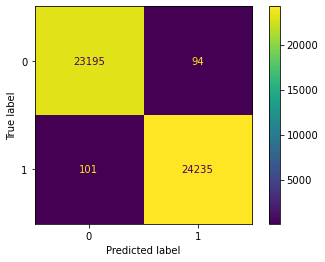

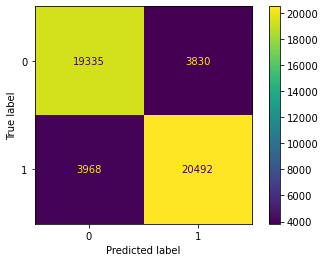

In [109]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
knn = KNeighborsClassifier(n_neighbors=1,metric='manhattan')

knn.fit(X_train, y_train)

y_test_hat=knn.predict(X_test) 

test_accuracy=accuracy_score(y_test,y_test_hat)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )
plot_confusion_matrix(grid,X_train, y_train,values_format='d' )
plot_confusion_matrix(grid,X_test, y_test,values_format='d' )

In [110]:
#GridSearch for RFC
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [50,100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
CV_rfc.fit(X_train, y_train)

# print best parameter after tuning
print(CV_rfc.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_sele

C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed whe

C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed whe

C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed whe

C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed whe

C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed whe

C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed whe

C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed whe

C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed whe

C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed whe

C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed whe

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}


In [ ]:
accuracy = CV_rfc.best_score_ *100
from sklearn.metrics import accuracy_score, plot_confusion_matrix
#Fit the best parameters
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 100, max_depth=8, criterion='gini')
rfc1.fit(X_train, y_train)
pred=rfc1.predict(X_test)
print("Accuracy for Random Forest on train data: ",accuracy)
print("Accuracy for Random Forest on test data: ",accuracy_score(y_test,pred))

In [ ]:
# GridSearch for SVM
from sklearn import svm
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
'kernel': ['rbf']} 
grid = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)

In [ ]:
accuracy =grid.best_score_ *100
from sklearn.metrics import accuracy_score, plot_confusion_matrix
#Fit the best parameters
svm1=svm.SVC(C=10, gamma=0.01, kernel='rbf')
svm1.fit(X_train, y_train)
pred=svm1.predict(X_test)
print("Accuracy for svm on train data: ",accuracy)
print("Accuracy for svm on test data: ",accuracy_score(y_test,pred))

In [ ]:
#logistic regression
param_grid = [
  {'penalty': ['l1'], 'solver': [ 'lbfgs', 'liblinear', 'sag', 'saga']},
  {'penalty': ['l2'], 'solver': ['newton-cg']},
 ]

grid = GridSearchCV(LogisticRegression(), param_grid,cv=5, scoring='accuracy', return_train_score=False,verbose=1)
# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)

accuracy =grid.best_score_ *100
from sklearn.metrics import accuracy_score, plot_confusion_matrix
#Fit the best parameters
lr=LogisticRegression()
lr.fit(X_train, y_train)
pred=lr.predict(X_test)
print("Accuracy for lr on train data: ",accuracy)
print("Accuracy for lr on test data: ",accuracy_score(y_test,pred))